In [1]:
import sys
import os
sys.path.append(os.path.abspath('..'))

import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt


plt.rcParams["figure.figsize"] = (6, 3)
plt.rcParams['axes.grid'] = False
plt.rcParams["axes.spines.top"] = False
plt.rcParams["axes.spines.right"] = False
plt.rcParams["font.size"] = 12
plt.rcParams["savefig.bbox"] = "tight"
plt.rcParams['figure.facecolor'] = 'white'

# Read in and simplify shapes
- probably three conditions in dataset:
1) boxes is empty
2) Boxes is a bounding box (four points)
3) Boxes is a segmentation mask of many points

In [2]:
import json

json_fp = "./data/annotations/rotifer-food-capture.v2i.coco/train/_annotations.coco.json"
with open(json_fp, 'r') as f:
    json_data = json.load(f)

image_ids = [image['id'] for image in json_data['images']]
file_names = [image['file_name'] for image in json_data['images']]
file_names = [fn.split("_jpg")[0] for fn in file_names]    

bboxes, img_id = [], []
for annotation in json_data["annotations"]:
    bboxes.append(annotation["bbox"])
    img_id.append(annotation["image_id"])

print("images", len(image_ids), "fns", len(file_names), "\nannot: (bb)", len(bboxes), "ids", len(img_id))

#d = {"ids" : image_ids, "file_names" : file_names,}

#pd.DataFrame.from_dict(d)
#df = df.sort_values(by="file_names")

images 126 fns 126 
annot: (bb) 108 ids 108


In [3]:
df_imgs = pd.DataFrame({"ids" : image_ids, "fns" : file_names})
df_annots = pd.DataFrame({"ids" : img_id, "bbox" : bboxes})
df_merged = pd.merge(df_imgs, df_annots, on="ids")
df_filtered = df_merged.dropna(subset="bbox")
df = df_filtered.sort_values(by="fns").reset_index(drop=True)
df

,ids,fns,bbox
0,101,frame_00579,"[530, 262, 29, 20]"
1,112,frame_00580,"[522, 261, 31, 20]"
2,25,frame_00581,"[516, 259, 29, 21]"
3,80,frame_00582,"[508, 257, 29, 20]"
4,69,frame_00583,"[500, 255, 29, 21]"
...,...,...,...
103,16,frame_04717,"[259, 154, 16.35, 11.63]"
104,32,frame_04718,"[255, 155, 16.76, 14.58]"
105,100,frame_04719,"[248, 158, 19.03, 14.58]"
106,44,frame_04720,"[240, 160, 19.94, 14.12]"


In [4]:
food_capture_dir = "./data/images/2024_0323_075154_003_food_capture_frames/"

df["img_fp"] = [os.path.join(food_capture_dir, f + ".jpg") for f in df.fns.tolist()]
from PIL import Image
from utils.piv_utils import plot_bbox

bbox, fp = df[["bbox", "img_fp"]].T.values
df["cm"] = [(np.mean([bb[0], bb[0] + bb[2]]), np.mean([bb[1], bb[1] + bb[3]])) for bb in bbox]

bbox[0], fp[0]

([530, 262, 29, 20],
 './data/images/2024_0323_075154_003_food_capture_frames/frame_00579.jpg')

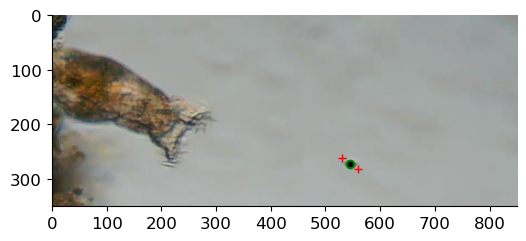

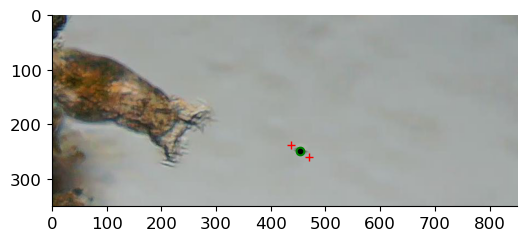

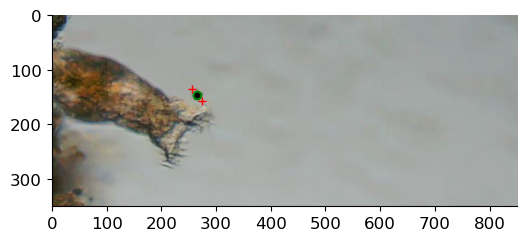

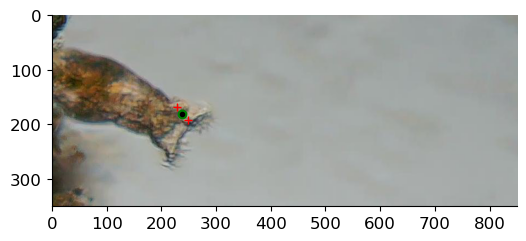

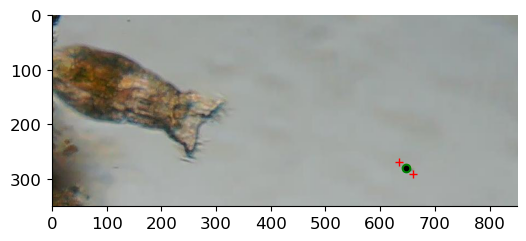

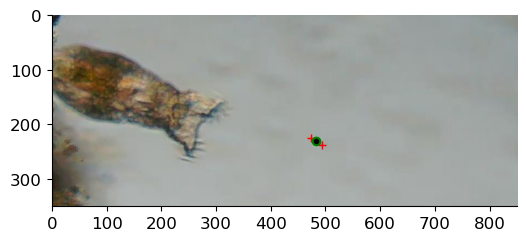

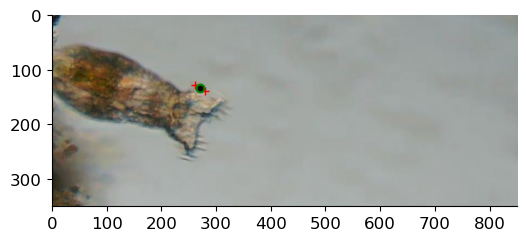

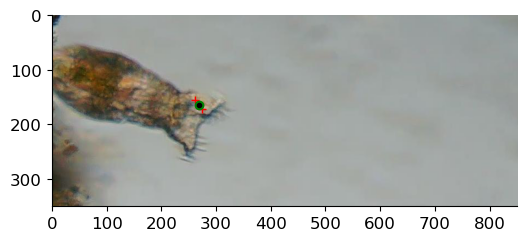

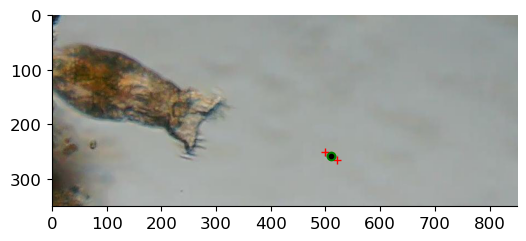

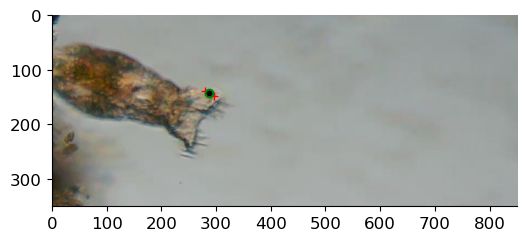

In [5]:
for nth in range(0, 100, 10):
    plt.figure()
    plt.imshow(Image.open(fp[nth]))
    plt.plot([bbox[nth][0], bbox[nth][0] + bbox[nth][2]],
             [bbox[nth][1], bbox[nth][1] + bbox[nth][3]], "+r")
    plt.plot(np.mean([bbox[nth][0], bbox[nth][0] + bbox[nth][2]]),
             np.mean([bbox[nth][1], bbox[nth][1] + bbox[nth][3]]), "go")
    plt.plot(df.cm.iloc[nth][0], df.cm.iloc[nth][1], "k.")
    #plot_bbox(bbox[0])

In [6]:
df.to_csv("./data/csvs/metadata_food_capture.csv", index=False)